In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.style.use(['seaborn-whitegrid'])


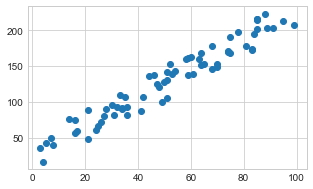

In [2]:
#시드 고정
seed = 43
np.random.seed(seed)

#데이터 준비
x = np.float64(np.random.randint(0,100,100))
bias = np.float64(np.random.randint(0,50,100))
y = 2 * x + bias
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=97)

#그래프
fig = plt.figure(figsize=(5,3))
plt.scatter(x_train ,y_train)
plt.show()

In [3]:
class Linear:
    """선형 회귀 클래스"""
    
    def __init__(self):
        """생성자"""
        self.w0 = 1.0
        self.b0 = 1.0
    
    def forward(self, x0):
        """순전파"""
        h0 = self.w0 * x0 + self.b0
        return h0
    
    def back(self, x0, y0, h0, m, alpha): #loss function : SE
        """역전파"""
        err = h0 - y0
        self.w0 = self.w0 - (alpha * err * x0) / m
        self.b0 = self.b0 - (alpha * err) / m
        w0 = self.w0
        b0 = self.b0
        #print(w0, b0)
        return w0, b0
        
    def fit(self, x, y, alpha=0.01, epoch=50):
        """모델 학습"""
        m = len(x)
        for i in range(epoch): #epoch
            for x0, y0 in zip(x, y):
                h0 = self.forward(x0)
                w, b = self.back(x0, y0, h0, m, alpha)
        return w, b
    
    def score(self, x_test, y_test): #cost function : RMSE
        """모델 평가"""
        score = 0
        m = len(x_test)
        
        for x0, y0 in zip(x_test, y_test):
            h = self.w0 * x0 + self.b0
            j = np.sqrt((h - y0)**2) / m
            score = score + j
            
        return score

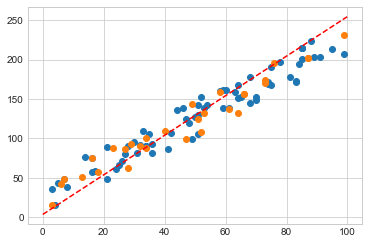

model RMSE : 15.437536435894371
weight : 2.51, bias : 3.68


In [4]:
#학습
model = Linear()
w, b = model.fit(x,y,alpha = 0.01)

#그래프
x_graph = np.arange(0,100,0.1)
fig = plt.figure()
plt.scatter(x_train ,y_train)
plt.scatter(x_test, y_test)
plt.plot(x_graph, w*x_graph + b, '--r')
plt.show()

#평가
print(f"model RMSE : {model.score(x_test, y_test)}")
print("weight : %.2f, bias : %.2f" % (model.w0, model.b0))